In [60]:
# acuratete = nr exp corect prezise / nr total de exp
"""
Știind că valoarea minimă a unui pixel este 0, iar valoarea maximă este 255,
calculați capetele a num_bins intervale (utilizați funcția linspace). Definiți
metoda values_to_bins care primește o matrice de dimensiune (n_samples,
n_features) și capetele intervalelor calculate anterior, iar pentru fiecare
exemplu și fiecare atribut calculează indexul intervalului corespunzător
(utilizați funcția np.digitize).
Folosiți funcția definită pentru a discretiza mulțimea de antrenare și cea de
testare.
"""
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

In [61]:
def calc_capete(num_bins):
    return np.linspace(start=0, stop=1, num=num_bins)

def values_to_bins(mat, capete):
    return np.digitize(mat, capete) - 1

In [62]:
train_img = np.loadtxt('data_MNIST/data/train_images.txt').astype(np.float32)
train_label = np.loadtxt('data_MNIST/data/train_labels.txt').astype(np.uint8)

test_img = np.loadtxt('data_MNIST/data/test_images.txt').astype(np.float32)
test_label = np.loadtxt('data_MNIST/data/test_labels.txt').astype(np.uint8)

In [63]:
bidim_train_img = train_img.reshape((1000, 28, 28))
bidim_test_img = test_img.reshape((500, 28, 28))

normalized_train_img = bidim_train_img / 255.0
normalized_test_img = bidim_test_img / 255.0

flat_train_img = normalized_train_img.reshape((1000, 28*28))
flat_test_img = normalized_test_img.reshape((500, 28*28))

In [64]:
capete = calc_capete(5)
discr_train_img = values_to_bins(flat_train_img, capete)
discr_test_img = values_to_bins(flat_test_img, capete)

In [65]:
nbm = MultinomialNB()
nbm.fit(discr_train_img, train_label)
nbm.score(discr_test_img, test_label) * 100

83.6

In [75]:
m = [x for x in range(2, 1001)]
nbm = MultinomialNB()
val_max = 0
i_max = 0
for x in m:
    capete = calc_capete(x)
    discr_train_img = values_to_bins(flat_train_img, capete)
    discr_test_img = values_to_bins(flat_test_img, capete)
    nbm.fit(discr_train_img, train_label)
    s = nbm.score(discr_test_img, test_label)
    if s > val_max:
        i_max = x
        val_max = s
    # print(f"Pentru num_bins={x} scorul este: {s*100}")
    
print(i_max, val_max*100)  # cea mai mare acuratete de 84.6% cu 91 capete (cu capete de la 2 la 1000)

91 84.6


Imagine clasificata ca 5 care este de fapt 2


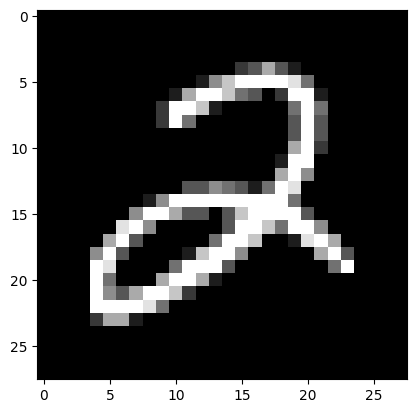

Imagine clasificata ca 6 care este de fapt 7


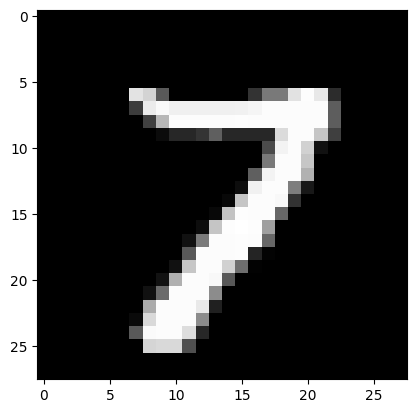

Imagine clasificata ca 4 care este de fapt 3


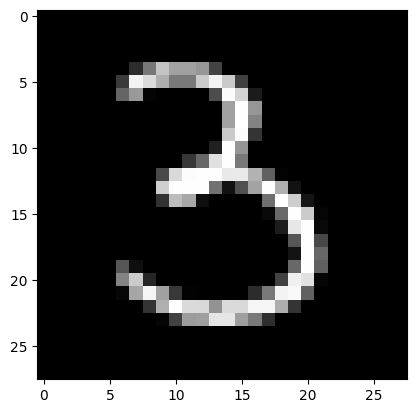

Imagine clasificata ca 7 care este de fapt 1


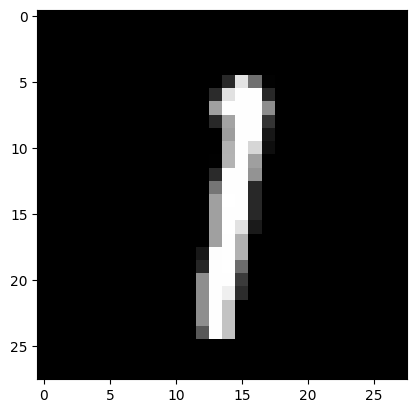

Imagine clasificata ca 2 care este de fapt 2


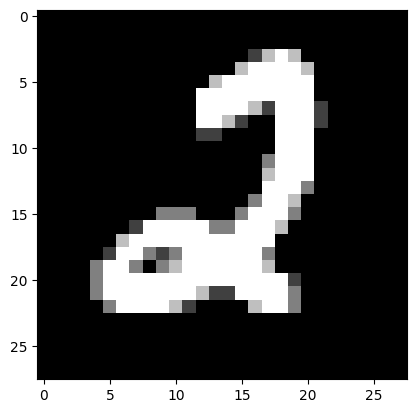

Imagine clasificata ca 1 care este de fapt 2


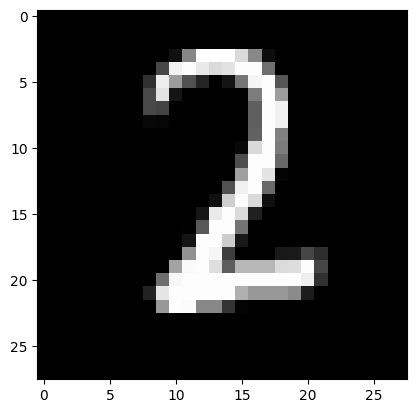

Imagine clasificata ca 3 care este de fapt 0


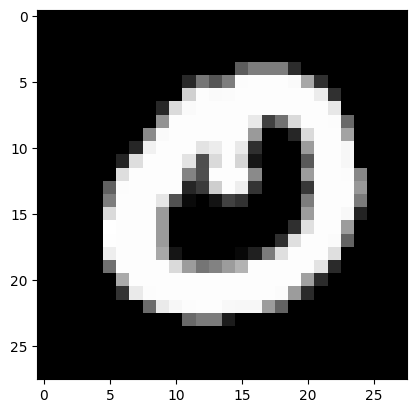

Imagine clasificata ca 1 care este de fapt 5


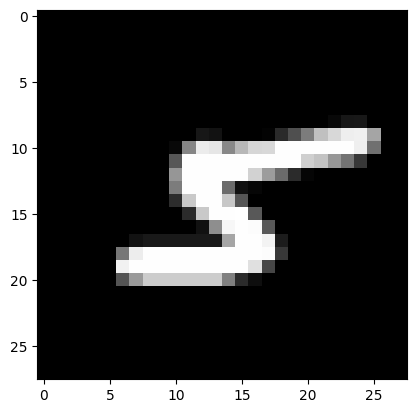

Imagine clasificata ca 6 care este de fapt 1


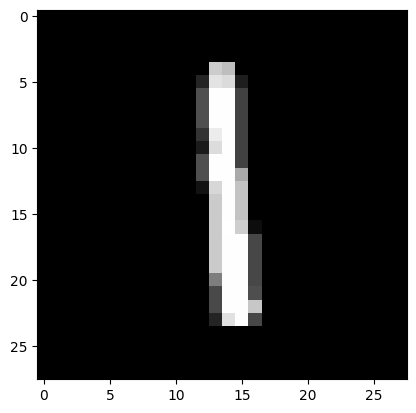

Imagine clasificata ca 9 care este de fapt 4


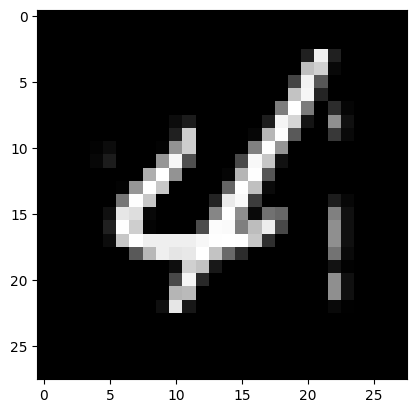

In [59]:
capete = calc_capete(i_max)
discr_train_img = values_to_bins(flat_train_img, capete)
discr_test_img = values_to_bins(flat_test_img, capete)

nbm.fit(discr_train_img, train_label)
pred = nbm.predict(discr_test_img)
misclasate = np.where(pred != test_label)[0]

for i in range(0, 10):
    print(f"Imagine clasificata ca {test_label[misclasate[i]]} care este de fapt {test_label[i]}")
    img = np.reshape(test_img[i], (28, 28))
    plt.imshow(img.astype(np.uint8), cmap='gray')
    plt.show()
    